# Question 2 - How Does Seasonality Impact Genre Success?

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import os
%matplotlib inline

In [5]:
# Pulling in our cleaned data, adding a profit column, and looking at head and info
df = pd.read_csv('cleaned_genre_exploration.csv')
df['profit'] = df['worldwide_gross']-df['production_budget']
display(df.head())
df.info()

,Unnamed: 0,Unnamed: 0.1,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count,tconst,...,G1,G2,G3,id_budg,release_date_budg,production_budget,domestic_gross,worldwide_gross,release_month,profit
0,#Horror,14656,"[18, 9648, 27, 53]",301325,de,6.099,2015-11-20,3.3,102,tt3526286,...,Crime,Drama,Horror,16,"Nov 20, 2015",1500000,0,0,11,-1500000
1,10 Cloverfield Lane,17422,"[53, 878, 18]",333371,en,17.892,2016-03-11,6.9,4629,tt1179933,...,Drama,Horror,Mystery,54,"Mar 11, 2016",5000000,72082999,108286422,3,103286422
2,10 Days in a Madhouse,15907,[18],345003,en,0.955,2015-11-20,5.4,7,tt3453052,...,Drama,NaN,NaN,48,"Nov 11, 2015",12000000,14616,14616,11,-11985384
3,12 Strong,24032,"[10752, 18, 36, 28]",429351,en,13.183,2018-01-19,5.6,1312,tt1413492,...,Action,Drama,History,64,"Jan 19, 2018",35000000,45819713,71118378,1,36118378
4,12 Years a Slave,7911,"[18, 36]",76203,en,16.493,2013-10-30,7.9,6631,tt2024544,...,Biography,Drama,History,18,"Oct 18, 2013",20000000,56671993,181025343,10,161025343


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756 entries, 0 to 2755
Data columns (total 23 columns):
Unnamed: 0           2756 non-null object
Unnamed: 0.1         2756 non-null int64
genre_ids            2756 non-null object
id                   2756 non-null int64
original_language    2756 non-null object
popularity           2756 non-null float64
release_date         2756 non-null object
vote_average         2756 non-null float64
vote_count           2756 non-null int64
tconst               2756 non-null object
primary_title        2756 non-null object
start_year           2756 non-null float64
runtime_minutes      2756 non-null float64
G1                   2756 non-null object
G2                   1949 non-null object
G3                   1330 non-null object
id_budg              2756 non-null int64
release_date_budg    2756 non-null object
production_budget    2756 non-null int64
domestic_gross       2756 non-null int64
worldwide_gross      2756 non-null int64
release_month 

In [47]:
g1_group = df.groupby(['G1', 'release_month'])['worldwide_gross', 'domestic_gross'].agg(['sum'])
g1_group.head()

worldwide_gross domestic_gross
                                 sum            sum
G1     release_month                               
Action 1                  6447260708     2823642222
       2                  5159785020     2179842914
       3                  8340266478     3163039959
       4                  7505453349     2376869355
       5                 17768119453     6184101954

In [136]:
#g1_group.plot(kind='barh', stacked = True, figsize = (15,30))

In [131]:
#g = sns.FacetGrid(df, col = 'G1', col_wrap = 5, height = 6)
#g.map(sns.lineplot, 'release_month', 'worldwide_gross');

In [135]:
df2 = df.groupby(['G1'])['worldwide_gross', 'domestic_gross'].agg(['sum'])
#display(df2.head(20))
#Top 5 categories are Action, Adventure, Drama, Comedy, and Documentary
#Hardcoding for now
g_cat1 = ['Action', 'Adventure', 'Drama', 'Comedy', 'Documentary']
g_cat2 = ['Biography', 'Horror', 'Crime', 'Animation', 'Family', 
          'Thriller', 'Fantasy', 'Sci-fi', 'Musical', 'Mystery', 
          'Music', 'Romance', 'Western', 'Sport']

In [130]:
#new data frame using only top 5 categories by worldwide gross and in the past 10 years
df3 = df[(df['G1'].isin(['Action', 'Adventure', 'Drama', 'Comedy', 'Documentary'])) 
         & (df['start_year'] > 2010)]

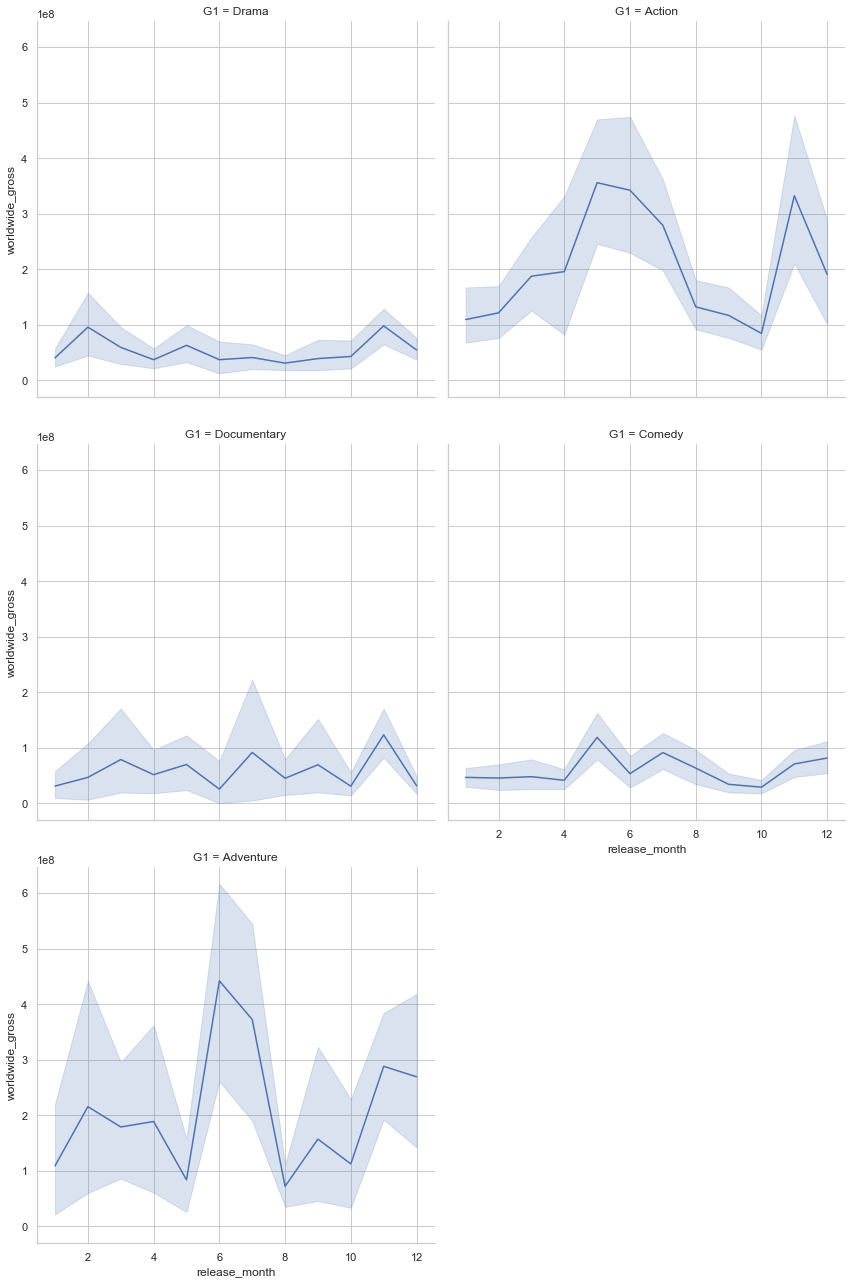

In [132]:
g = sns.FacetGrid(df3, col = 'G1', col_wrap = 2, height = 6)
g.map(sns.lineplot, 'release_month', 'worldwide_gross');